# Funciones de distribución de probabilidades

## Distribución uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100187., 100159.,  99868.,  99775.,  99700.,  99894., 100045.,
         99925., 100073., 100374.]),
 array([ 1.0001971 , 10.90014475, 20.8000924 , 30.70004005, 40.59998771,
        50.49993536, 60.39988301, 70.29983066, 80.19977831, 90.09972596,
        99.99967362]),
 <BarContainer object of 10 artists>)

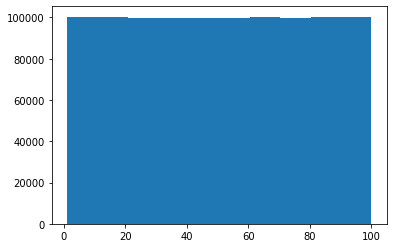

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución normal

In [4]:
data = np.random.randn(1000000)

In [5]:
x = range(1,1000001)

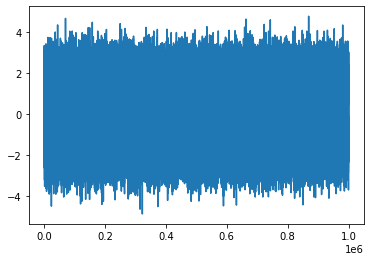

In [6]:
plt.plot(x, data)

(array([4.20000e+01, 1.59700e+03, 2.19910e+04, 1.30948e+05, 3.23892e+05,
        3.40751e+05, 1.50569e+05, 2.79080e+04, 2.23400e+03, 6.80000e+01]),
 array([-4.87268566, -3.90880284, -2.94492001, -1.98103719, -1.01715437,
        -0.05327154,  0.91061128,  1.87449411,  2.83837693,  3.80225975,
         4.76614258]),
 <BarContainer object of 10 artists>)

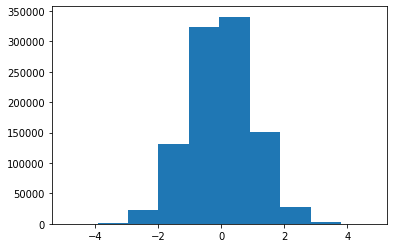

In [7]:
plt.hist(data)

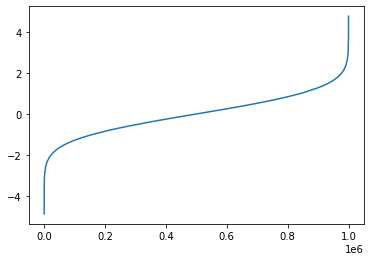

In [8]:
plt.plot(x, sorted(data))

(array([3.000e+00, 4.100e+01, 2.710e+02, 1.227e+03, 2.636e+03, 3.084e+03,
        1.925e+03, 6.800e+02, 1.220e+02, 1.100e+01]),
 array([-5.19875398, -3.16444777, -1.13014156,  0.90416465,  2.93847085,
         4.97277706,  7.00708327,  9.04138948, 11.07569568, 13.11000189,
        15.1443081 ]),
 <BarContainer object of 10 artists>)

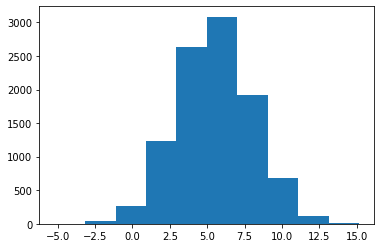

In [9]:
mu = 5.5
sd = 2.5
z_10k = np.random.randn(10000)
data = mu + sd * z_10k # z = (x - mu) / sd -> N(0,1), X = mu + sd * Z 
plt.hist(data)

In [10]:
data = np.random.randn(2,4)
data

array([[-0.58330088,  0.84549741,  0.12775296,  1.16140523],
       [-0.590284  , -0.8400758 ,  0.34937812,  0.16641219]])

# La simulación de Monte Carlo

* 1.- Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces
* 2.- Calcularemos x² + y².
    * Si el valor es menor a 1 = estamos dentro del circulo.
    * Si el vamor es mayor a 1 = estamos fuera del circulo.
* 3.- Calculamos el número total de veces que están dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo.
* 4.- Usamos dicha probabilidad para aproximar el valor de π.
* 5.- Repetimos el experimento un numero suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π.
* 6.- Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

In [11]:
def pi_motecarlo(n, n_exp):    
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg / n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.142243999999997


(3.142243999999997, [<matplotlib.lines.Line2D at 0x7f2e8f7ee2d0>])

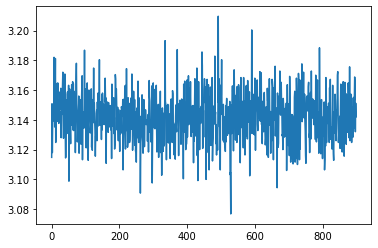

In [12]:
pi_motecarlo(10000,900)

* Explicacion:

    * Si elegimos un punto (x,y) al azar, la formula r = √x²+y² nos dice a qué distancia está ese punto del centro (0,0)

    * Entonces, teniendo un circulo con centro en (0,0) y un radio de 1, si elegimos un punto al azar (0.2, 0.5), la distancia de ese punto hasta el centro del circulo será dada por √0.2²+0.5²

    * Como sabemos que el radio es de 1, cualquier punto que se encuentre a mas de 1 de distancia del centro, estará por fuera del circulo

    * Este caso: √0.2²+0.5²  = 0.53 (el punto está a una distancia de 0.53 del origen, por ende está dentro del circulo)

    * Si elegimos un punto al azar (0.9, 0.9) seria:

    * √0.9²+0.9² = 1.27

    * El punto está a 1.27 del centro, como el radio es de 1, cualquier punto que esté a una distancia mayor a 1, está fuera del circulo.

# Dummy Data Sets

* A = Distribuye normal media = 0 y desviacion tipica = 1
* B = Distribuye normal media = 1.5 y desviacion tipica = 2.5
* C = Distribuye uniforme entre 5 y 32

In [19]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [22]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000174,1.499963,18.500880
std,0.999846,2.498492,7.794507
min,-4.946028,-11.237654,5.000063
25%,-0.674079,-0.186304,11.743383
50%,-0.000256,1.501298,18.499652
75%,0.673836,3.185999,25.241676
max,4.781931,14.044567,31.999997


(array([3.40000e+01, 1.34300e+03, 2.01180e+04, 1.23826e+05, 3.21998e+05,
        3.46129e+05, 1.55290e+05, 2.89710e+04, 2.23000e+03, 6.10000e+01]),
 array([-4.94602805, -3.97323212, -3.00043619, -2.02764025, -1.05484432,
        -0.08204839,  0.89074754,  1.86354348,  2.83633941,  3.80913534,
         4.78193127]),
 <BarContainer object of 10 artists>)

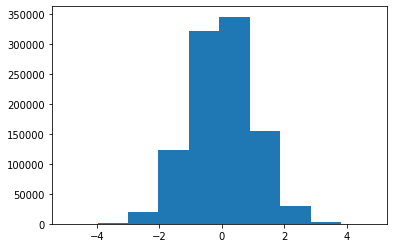

In [23]:
plt.hist(data["A"])

(array([1.60000e+01, 1.04500e+03, 1.86220e+04, 1.27106e+05, 3.37666e+05,
        3.50195e+05, 1.41619e+05, 2.24230e+04, 1.28000e+03, 2.80000e+01]),
 array([-11.23765402,  -8.70943195,  -6.18120989,  -3.65298783,
         -1.12476577,   1.4034563 ,   3.93167836,   6.45990042,
          8.98812249,  11.51634455,  14.04456661]),
 <BarContainer object of 10 artists>)

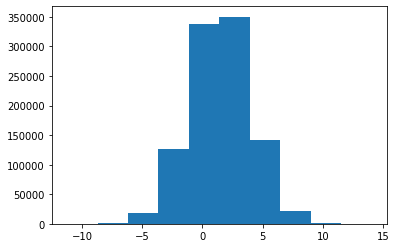

In [24]:
plt.hist(data["B"])

(array([ 99918., 100174., 100077.,  99771., 100079.,  99376., 100724.,
        100139.,  99913.,  99829.]),
 array([ 5.00006275,  7.70005615, 10.40004955, 13.10004295, 15.80003636,
        18.50002976, 21.20002316, 23.90001656, 26.60000997, 29.30000337,
        31.99999677]),
 <BarContainer object of 10 artists>)

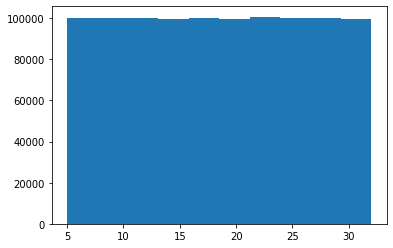

In [25]:
plt.hist(data["C"])

In [26]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [27]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [29]:
colums_names = data.columns.values.tolist()

In [32]:
a = len(colums_names)
a

21

In [41]:
new_data = pd.DataFrame(
    {
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a),
        'Columns Name': colums_names
    }, index= range(42,42+a)
)

In [42]:
new_data

,A,B,Columns Name
42,1.444819,0.895814,State
43,0.772431,0.411230,Account Length
44,-0.800780,0.047024,Area Code
45,-0.987185,0.201210,Phone
46,-0.208710,0.584122,Int'l Plan
47,-0.081831,0.740625,VMail Plan
48,-0.398392,0.746657,VMail Message
49,-2.636388,0.032075,Day Mins
50,-0.253737,0.843065,Day Calls
51,1.304364,0.342012,Day Charge
